# Davis data scrubber

This is an interactive data scrubber for browsing through a Davis displacement data set.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import HRDIC_analysis as hrdic
%matplotlib notebook

This cell imports the data into a list `f_list`:

In [2]:
f_list=[]
pos_list=range(1,10)
for pos in pos_list:
    for inc in range(1,4):
        fname ='../data/p{0}-{1}.TXT'.format(pos,inc)
        def_map = hrdic.DeformationMap('../data/',fname)
        f_list.append(def_map)

The scrubbing function:

In [3]:
def scrubF(fig,f_list,measurement,component,cmin=0.0,cmax=0.5):
    fmap=f_list[measurement]
    if component == 'f11':
        fig.set_data(fmap.f11)
        fig.axes.set_title(r'$F_{11}$')
        def_map.set_cmap('viridis')
    if component == 'f22':
        fig.set_data(fmap.f22)
        fig.axes.set_title(r'$F_{22}$')
        def_map.set_cmap('viridis')
    if component == 'f12':
        fig.set_data(fmap.f12)
        fig.axes.set_title(r'$F_{12}$')
        def_map.set_cmap('bwr')
    if component == 'f21':
        fig.set_data(fmap.f21)
        fig.axes.set_title(r'$F_{21}$')
        def_map.set_cmap('bwr')
    if component == 'Max shear':
        fig.set_data(fmap.max_shear)
        fig.axes.set_title(r'$Max shear$')
        def_map.set_cmap('viridis')
    def_map.set_clim([cmin,cmax])
    plt.draw()

Setup the plot:

<IPython.core.display.Javascript object>


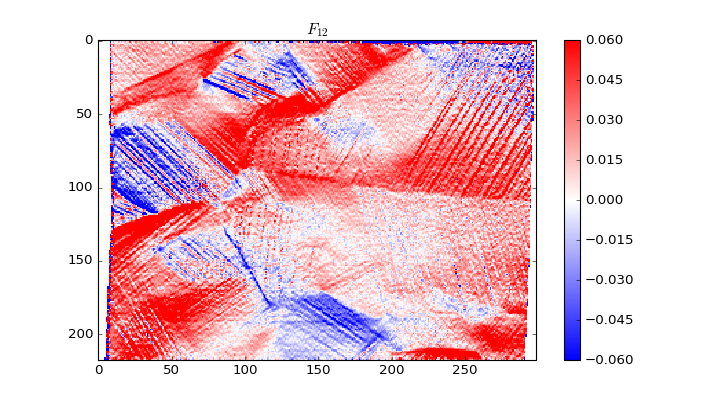

In [4]:
f,ax=plt.subplots(1,1,figsize=(9,5))
def_map=ax.imshow(f_list[0].f12[10:-10,10:-10],
                  vmin=0,vmax=0.09,
                  cmap='viridis',
                  interpolation='none')
plt.colorbar(def_map);

Scrub away:

In [5]:
interactive(scrubF, fig=fixed(def_map), f_list=fixed(f_list) , measurement=(1,27),
            component=('f11','f22','f12','f21','Max shear'),
            cmin=(-0.5,0,0.01),
            cmax=(0,0.6,0.01))